In [0]:
import pandas as pd

In [0]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
 
# Dataset is now stored in a Pandas Dataframe

recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
 
# Dataset is now stored in a Pandas Dataframe

death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
 
# Dataset is now stored in a Pandas Dataframe


In [0]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [0]:
confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

In [746]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
31057,NaN,Jersey,49.1900,-2.110,3/23/20,0.0
31058,NaN,Puerto Rico,18.2000,-66.500,3/23/20,0.0
31059,NaN,Republic of the Congo,-1.4400,15.556,3/23/20,0.0
31060,NaN,The Bahamas,24.2500,-76.000,3/23/20,0.0
31061,NaN,The Gambia,13.4667,-16.600,3/23/20,0.0


In [0]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [748]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [0]:
df = df[['Country/Region','Date','Confirmed','Recovered','Deaths']].loc[df['Country/Region'] == 'US']


In [750]:
df.tail()

,Country/Region,Date,Confirmed,Recovered,Deaths
30978,US,3/23/20,23.0,0.0,1.0
30992,US,3/23/20,27.0,0.0,1.0
31009,US,3/23/20,NaN,NaN,NaN
31052,US,3/23/20,6.0,0.0,0.0
31053,US,3/23/20,1.0,178.0,0.0


In [0]:
df = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [752]:
df.tail()

,Confirmed,Recovered,Deaths
Date,,,
3/5/20,217.0,7.0,12.0
3/6/20,262.0,7.0,14.0
3/7/20,402.0,7.0,17.0
3/8/20,518.0,7.0,21.0
3/9/20,583.0,7.0,22.0


In [753]:
df_per_day.tail()

,Confirmed,Recovered,Deaths
Date,,,
3/5/20,5.0,0.0,0.0
3/6/20,6.0,0.0,0.0
3/7/20,6.0,0.0,0.0
3/8/20,6.0,1.0,0.0
3/9/20,6.0,1.0,0.0


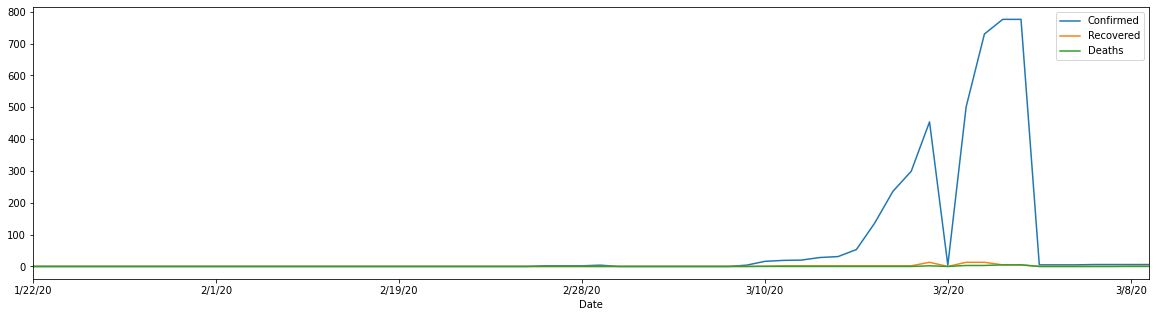

In [754]:
df_per_day.plot(kind='line',figsize=(20,5))


In [0]:
#Facebook Forecasting Library
import fbprophet

In [0]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [757]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [758]:
# Split Dataset
df

,Confirmed,Recovered,Deaths
Date,,,
1/22/20,1.0,0.0,0.0
1/23/20,1.0,0.0,0.0
1/24/20,2.0,0.0,0.0
1/25/20,2.0,0.0,0.0
1/26/20,5.0,0.0,0.0
...,...,...,...
3/5/20,217.0,7.0,12.0
3/6/20,262.0,7.0,14.0
3/7/20,402.0,7.0,17.0


In [0]:
US_cases = df.reset_index()

In [760]:
US_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/22/20,1.0,0.0,0.0
1,1/23/20,1.0,0.0,0.0
2,1/24/20,2.0,0.0,0.0
3,1/25/20,2.0,0.0,0.0
4,1/26/20,5.0,0.0,0.0


In [761]:
US_cases.tail()

,Date,Confirmed,Recovered,Deaths
57,3/5/20,217.0,7.0,12.0
58,3/6/20,262.0,7.0,14.0
59,3/7/20,402.0,7.0,17.0
60,3/8/20,518.0,7.0,21.0
61,3/9/20,583.0,7.0,22.0


In [0]:
confirmed_cases = US_cases[["Date","Confirmed"]]
recovered_cases = US_cases[["Date","Recovered"]]

In [763]:
confirmed_cases.shape

(62, 2)

In [764]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
train = confirmed_cases[:60]
test = confirmed_cases[60:]

In [766]:
train 

,ds,y
0,1/22/20,1.0
1,1/23/20,1.0
2,1/24/20,2.0
3,1/25/20,2.0
4,1/26/20,5.0
5,1/27/20,5.0
6,1/28/20,5.0
7,1/29/20,5.0
8,1/30/20,5.0
9,1/31/20,7.0


In [767]:
test

,ds,y
60,3/8/20,518.0
61,3/9/20,583.0


In [768]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Future Date
future_dates = m.make_future_dataframe(periods=50)

In [770]:
future_dates


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
105,2020-05-08
106,2020-05-09
107,2020-05-10
108,2020-05-11


In [0]:
# Prediction
prediction =  m.predict(future_dates)

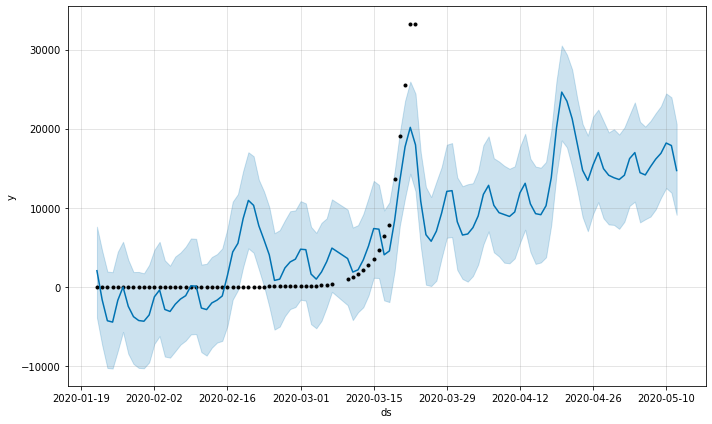

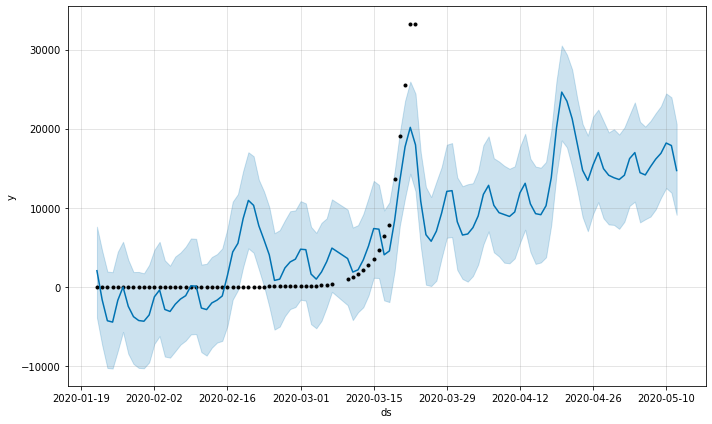

In [772]:
# Plot Prediction
m.plot(prediction)

In [0]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

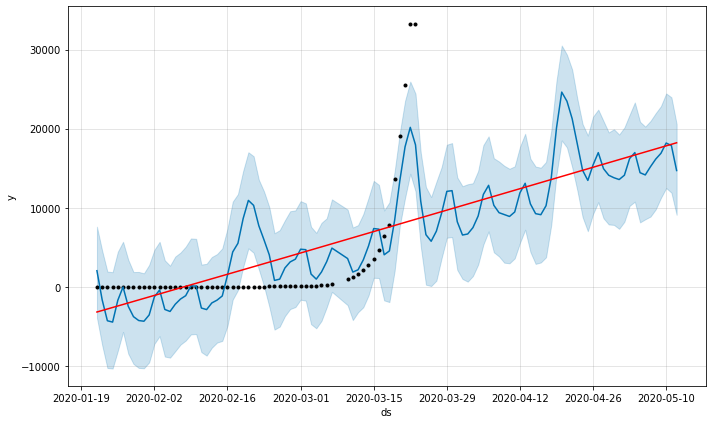

In [774]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)